In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.multiclass_extensions import AllPairs
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

import sklearn

seed = 10599
aqua_globals.random_seed = seed

In [44]:
### Import, process data
df = pd.read_csv("data/stem_processed.csv")

### Subset
df = df.iloc[0:20,0:10]

x = df.drop(columns=['TECH3', 'TECH6'])
y = df[['TECH3', 'TECH6']]

feature_dim = len(x.columns)

xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

train_inp_3 = {}
test_inp_3 = {}
train_inp_6 = {}
test_inp_6 = {}

for i in range(3):
    train_inp_3[i] = xtrain[ytrain['TECH3'] == i].values
    test_inp_3[i] = xtest[ytest['TECH3'] == i].values
    train_inp_6[i] = xtrain[ytrain['TECH6'] == i].values
    test_inp_6[i] = xtest[ytest['TECH6'] == i].values

temp = [test_inp_3[k] for k in test_inp_3]
total_array_3 = np.concatenate(temp)
temp = [test_inp_6[k] for k in test_inp_3]
total_array_6 = np.concatenate(temp)

In [45]:
class_labels = [0,1,2]

### Create the QSVM
    # Alternate multiclass extension: OneAgainstRest(), ErrorCorrectingCode(code_size=5)
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, train_inp_3, test_inp_3, total_array_3, multiclass_extension=AllPairs())

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

In [ ]:
for k,v in result.items():
    print(f'{k} : {v}')


# print(qsvm.label_to_class)

# print(f'Testing success ratio: {result["testing_accuracy"]}')
# print()
# print('Prediction from datapoints set:')
# print(f'  ground truth: {map_label_to_class_name(class_labels, qsvm.label_to_class)}')
# print(f'  prediction:   {result["predicted_classes"]}')
# predicted_labels = result["predicted_labels"]
# print(f'  success rate: {100*np.count_nonzero(predicted_labels == class_labels)/len(predicted_labels)}%')

In [ ]:
### Visualize results
kernel_matrix = result['kernel_matrix_training']
plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r');

Testing success ratio: 0.65

Prediction from datapoints set:
  ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
  prediction:   ['B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'A']
  success rate: 55.0%


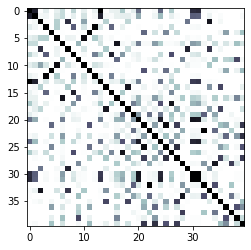

In [5]:
from qiskit.aqua.algorithms import SklearnSVM

result = SklearnSVM(training_input, test_input, datapoints[0]).run()

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

kernel_matrix = result['kernel_matrix_training']
plt.imshow(np.asmatrix(kernel_matrix), interpolation='nearest', origin='upper', cmap='bone_r');

In [ ]:
# df = df.drop(columns=[''])
# label_col = 'TECH3'

# labels = set(df[label_col])

# data_dict = {}
# for label in labels:
#     data_dict.update({label:df[df[label_col] == label].drop(columns=[label_col]).to_numpy()})
    
# data_dict

In [ ]:
# from qiskit.ml.datasets import iris, ad_hoc_data, sample_ad_hoc_data

# feature_dim = 4
# training_size = 110
# test_size = 40

# sample_total, training_input, test_input, class_labels = iris(
#     training_size=training_size,
#     test_size=test_size,
#     n=feature_dim)

# print(test_input)